In [1]:
from scipy.io import arff
import pandas as pd
import os

# 784 pixel로 이뤄진 mnist 이미지 데이터 호출
path = './data/mnist_784.arff'
mnist = arff.loadarff(path)

In [2]:
df = pd.DataFrame(mnist[0])
df['label'] = df['class'].apply(lambda i : str(i)[2])

n_image = mnist[0].shape[0]
pixel_columns = list(df.columns[:-2])

In [3]:
import numpy as np

# 결과가 재생산 가능하도록 랜덤 시드를 지정합니다.
np.random.seed(30)

# 이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열을 담습니다.
rndperm = np.random.permutation(n_image)

# 랜덤으로 섞은 이미지 중 10,000개를 뽑고, df_subset에 담습니다.
n_image_sample = 10000
random_idx = rndperm[:n_image_sample]
df_subset = df.loc[random_idx,:].copy()
df_subset.shape

(10000, 786)

<Figure size 640x480 with 0 Axes>

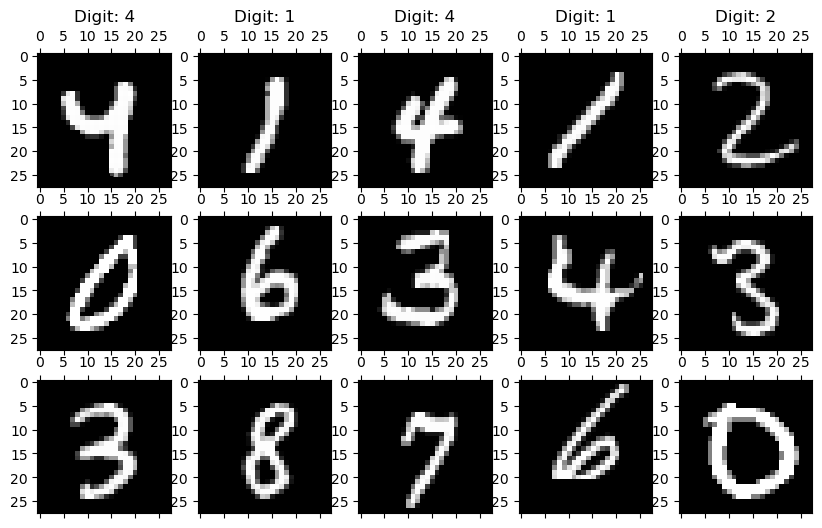

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure( figsize=(10,6) )
n_img_sample = 15
width,height = 28,28

# 15개 샘플을 시각화해 봅니다. 
for i in range(0,n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3,5,i+1, title=f"Digit: {row['label']}")
    ax.matshow(row[pixel_columns]
               .values.reshape((width,height))
               .astype(float))

plt.show()

## PCA 를 이용한 MNIST 차원축소


In [5]:
from sklearn.decomposition import PCA

print(f"df_subset의 shape: {df_subset.shape}")

n_dimension = 2 # 축소시킬 목표 차원의 수
pca = PCA(n_components=n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values) # 차원을 축소한 결과
df_subset['pca-one'] = pca_result[:,0] # 축소한 결과의 첫 번째 차원 값
df_subset['pca-two'] = pca_result[:,1] # 축소한 결과의 두 번째 차원 값

print(f"pca_result의 shape: {pca_result.shape}")

df_subset의 shape: (10000, 786)
pca_result의 shape: (10000, 2)



Principal Component 별로 보존하는 정보량을 확인합니다

차원을 축소한 댓가로 차원의 정보량 중 일부만 남게 됩니다.
sklearn의 PCA 모듈은 PC 축 마다 보존하는 정보량의 비율을 제시해 줍니다.

In [6]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 9.6%
pca-2: 7.3%


784차원을 2차원으로 차원축소 하였을 때, 정보량이 전체의 16.9%가 남게 됩니다.

<Axes: xlabel='pca-one', ylabel='pca-two'>

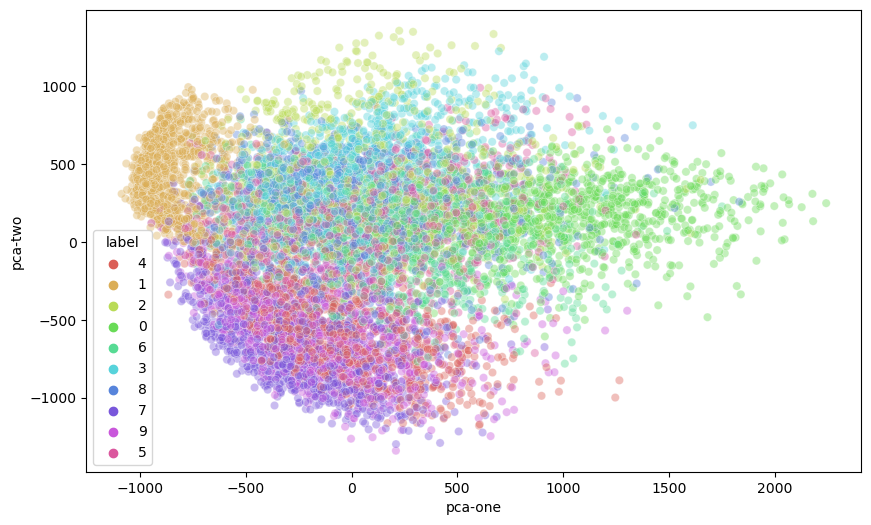

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,   # 2개의 PC축만 남은 데이터프레임 df_subset 을 시각화해 보자.
    legend="full",
    alpha=0.4
)

PCA로 784차원을 2차원으로 줄인 결과 벡터를 Scatter 그래프로 그려보았습니다
같거나 모양이 비슷한 숫자 이미지가 유사한 벡터값을 갖는것을 색상으로 확인할 수 있습니다.

## T-SNE 를 이용한 MNIST 차원축소

이번에는 사이킷런에서 제공하는 T-SNE 모듈을 사용하여 동일한 1만 개의 이미지 데이터의 차원을 축소해 봅시다.

scikit-learn 공식 문서: TSNE 모듈
(주의) 아래 코드의 tsne.fit_transform() 은 PCA보다는 확실히 시간이 많이 걸립니다. 몇분 정도 여유를 가지고 기다려 주세요

In [9]:
from sklearn.manifold import TSNE

print(f"df_subset의 shape: {df_subset.shape}")

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print(f"tsne_results의 shape: {tsne_results.shape}")

df_subset의 shape: (10000, 788)
tsne_results의 shape: (10000, 2)


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

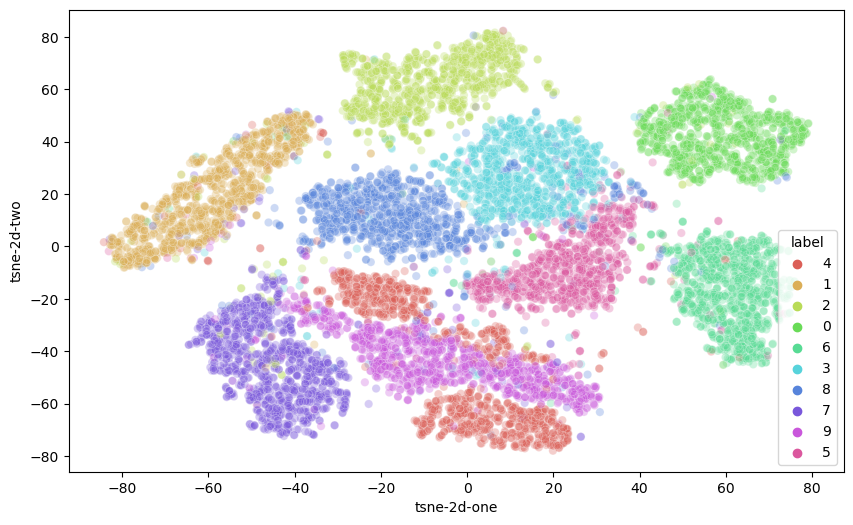

In [10]:
# tsne 결과를 차원별로 추가합니다.
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

# 시각화해 봅니다.
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)